# Лабораториска вежба 5
## Машинска визија 2018/2019
### Андреј Јанчевски

In [69]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
import pandas as pd

### Вчитување на сликите

In [70]:
train_set=pd.read_csv("train.csv", header=None)
train_images_files=list(train_set[0])
train_images_classes=list(train_set[2])
train_images_classes=dict(zip(train_images_files, train_images_classes))
train_images_classes

{'83.JPG': 1,
 '71.JPG': 2,
 '14.JPG': 3,
 '112.JPG': 4,
 '114.JPG': 4,
 '115.JPG': 4,
 '120.JPG': 5,
 '121.JPG': 5,
 '124.JPG': 5,
 '125.JPG': 5,
 '126.JPG': 5,
 '127.JPG': 5,
 '34.JPG': 6,
 '36.JPG': 6,
 '78.JPG': 7,
 '81.JPG': 7,
 '82.JPG': 7,
 '62.JPG': 8,
 '63.JPG': 8,
 '28.JPG': 9,
 '29.JPG': 9,
 '103.JPG': 10,
 '104.JPG': 10,
 '172.JPG': 11,
 '100.JPG': 12,
 '168.JPG': 13,
 '177.JPG': 13,
 '60.JPG': 13,
 '99.JPG': 13,
 '110.JPG': 14,
 '53.JPG': 15,
 '58.JPG': 15,
 '182.JPG': 16,
 '22.JPG': 17,
 '24.JPG': 17,
 '26.JPG': 17,
 '27.JPG': 17,
 '92.JPG': 18,
 '93.JPG': 19,
 '96.JPG': 19,
 '38.JPG': 20,
 '40.JPG': 20,
 '181.JPG': 21,
 '59.JPG': 22,
 '69.JPG': 22,
 '75.JPG': 23,
 '77.JPG': 23,
 '16.JPG': 24,
 '17.JPG': 24,
 '20.JPG': 25,
 '10.JPG': 26,
 '11.JPG': 26,
 '185.JPG': 27,
 '0.JPG': 28,
 '1.JPG': 28,
 '65.JPG': 29,
 '41.JPG': 30,
 '44.JPG': 30,
 '86.JPG': 31,
 '87.JPG': 31,
 '106.JPG': 32,
 '183.JPG': 33,
 '203.JPG': 34,
 '46.JPG': 35,
 '47.JPG': 35,
 '169.JPG': 36,
 '116.JPG'

In [71]:
test_set=pd.read_csv("test.csv", header=None)
test_images_files=list(test_set[0])
test_images_classes=list(test_set[2])
test_images_classes=dict(zip(test_images_files, test_images_classes))
test_images_classes

{'84.JPG': 1,
 '85.JPG': 1,
 '72.JPG': 2,
 '73.JPG': 2,
 '13.JPG': 3,
 '15.JPG': 3,
 '113.JPG': 4,
 '122.JPG': 5,
 '123.JPG': 5,
 '35.JPG': 6,
 '184.JPG': 40,
 '79.JPG': 7,
 '80.JPG': 7,
 '64.JPG': 8,
 '30.JPG': 9,
 '31.JPG': 9,
 '32.JPG': 9,
 '33.JPG': 9,
 '180.JPG': 11,
 '201.JPG': 11,
 '101.JPG': 12,
 '102.JPG': 12,
 '108.JPG': 13,
 '163.JPG': 13,
 '3.JPG': 13,
 '97.JPG': 13,
 '98.JPG': 13,
 '111.JPG': 14,
 '54.JPG': 15,
 '55.JPG': 15,
 '56.JPG': 15,
 '57.JPG': 15,
 '23.JPG': 17,
 '25.JPG': 17,
 '90.JPG': 18,
 '91.JPG': 18,
 '94.JPG': 19,
 '95.JPG': 19,
 '37.JPG': 20,
 '39.JPG': 20,
 '61.JPG': 22,
 '68.JPG': 22,
 '70.JPG': 22,
 '74.JPG': 23,
 '76.JPG': 23,
 '18.JPG': 24,
 '19.JPG': 25,
 '21.JPG': 25,
 '12.JPG': 26,
 '8.JPG': 26,
 '9.JPG': 26,
 '2.JPG': 28,
 '66.JPG': 29,
 '67.JPG': 29,
 '42.JPG': 30,
 '43.JPG': 30,
 '45.JPG': 30,
 '88.JPG': 31,
 '89.JPG': 31,
 '105.JPG': 32,
 '107.JPG': 32,
 '204.JPG': 34,
 '48.JPG': 35,
 '170.JPG': 36,
 '118.JPG': 37,
 '119.JPG': 37,
 '49.JPG': 37,

In [72]:
def display_image(img):
    if len(img.shape) > 2:
        img_to_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(img_to_show)
        plt.xticks([])
        plt.yticks([])
        plt.show()
    else:
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.show()

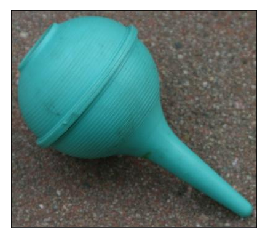

In [142]:
train_images = []
for train_images_file in train_images_files:
    train_images.append(
        cv2.imread("Training/" + train_images_file, cv2.IMREAD_COLOR))

display_image(train_images[0])

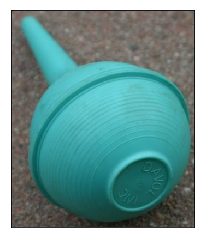

In [143]:
test_images = []
for test_images_file in test_images_files:
    test_images.append(
        cv2.imread("TestSingleObjects/" + test_images_file, cv2.IMREAD_COLOR))

display_image(test_images[0])

### Препознавање со помош на карактеристични точки

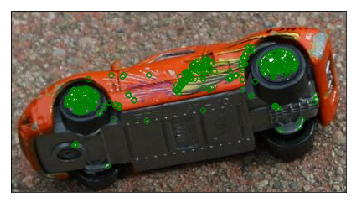

array([[ 94, 223, 133, ..., 247, 129, 113],
       [167, 180, 244, ..., 105,  90, 135],
       [204, 207, 220, ..., 241, 129,  33],
       ...,
       [172, 122, 233, ..., 217,  86, 250],
       [ 15, 210, 207, ...,  15,  49, 240],
       [  7, 179, 193, ...,   3,  33, 211]], dtype=uint8)

In [144]:
orb_detect = cv2.ORB_create()
orb_extract = cv2.ORB_create()
FLANN_INDEX_LINEAR = 0
FLANN_INDEX_KDTREE = 1
FLANN_INDEX_KMEANS = 2
FLANN_INDEX_COMPOSITE = 3
FLANN_INDEX_KDTREE_SINGLE = 4
FLANN_INDEX_HIERARCHICAL = 5
FLANN_INDEX_LSH = 6
FLANN_INDEX_SAVED = 254
FLANN_INDEX_AUTOTUNED = 255
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=100)
flann_matcher = cv2.FlannBasedMatcher(index_params, search_params)
bow_kmeans_trainer = cv2.BOWKMeansTrainer(10)
extract_bow = cv2.BOWImgDescriptorExtractor(orb_extract, flann_matcher)


def get_keypoint_features(img, display_images=False):
    keypoints, descriptors = orb_extract.compute(img, orb_detect.detect(img))
    img_with_keypoints = np.zeros(img.shape, dtype='uint8')
    cv2.drawKeypoints(
        img, keypoints, img_with_keypoints, color=(0, 127, 0), flags=0)
    if display_images:
        display_image(img_with_keypoints)
    return descriptors


get_keypoint_features(train_images[10], True)

In [145]:
for train_image in train_images:
    features = get_keypoint_features(train_image)
    features = np.array(features, dtype='float32')
    bow_kmeans_trainer.add(features)

voc = bow_kmeans_trainer.cluster()
extract_bow.setVocabulary(voc)

In [146]:
def get_bow_features(img):
    return extract_bow.compute(img, orb_detect.detect(img))


get_bow_features(np.array(train_images[0]))

error: OpenCV(3.4.4) C:\projects\opencv-python\opencv\modules\flann\src\miniflann.cpp:488: error: (-215:Assertion failed) query.type() == type && indices.type() == CV_32S && dists.type() == dtype in function 'cv::flann::runKnnSearch_'


In [153]:
def classify_image_by_keypoints(img):
    similarities = {}
    for i, train_image in enumerate(train_images):
        similarities[train_images_files[i]] = matchKeypoints(img, train_image)
    best_image = max(similarities.items(), key=lambda x: x[1])[0]
    return train_images_classes[best_image]


correct_predictions = 0
for i, test_image in enumerate(test_images):
    # print("Classifying: " + test_images_files[i])
    prediction = classify_image_by_keypoints(test_image)
    if prediction == test_images_classes[test_images_files[i]]:
        correct_predictions += 1

print("Accuracy: " + str(correct_predictions / len(test_images)))

Accuracy: 0.2191780821917808


### Препознавање со помош на рабови

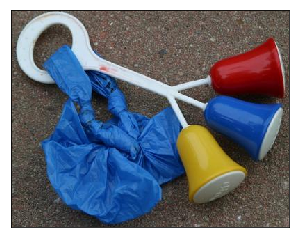

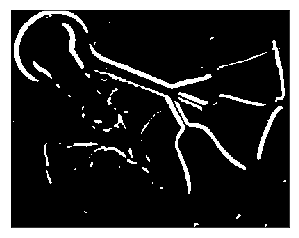

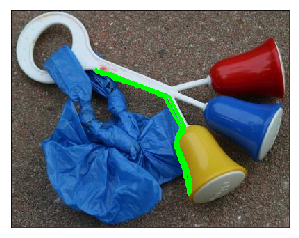

In [393]:
def get_best_contour(img, display_images=False):
    if display_images:
        display_image(img)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (11, 11), 0)
    sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    h_edges = cv2.filter2D(img_gray, ddepth=-1, kernel=sobel_h)
    v_edges = cv2.filter2D(img_gray, ddepth=-1, kernel=sobel_v)
    edges = cv2.bitwise_or(h_edges, v_edges)
    edges = cv2.GaussianBlur(edges, (3, 3), 0)
    #edges = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    _, edges = cv2.threshold(edges, 0, 255, cv2.THRESH_OTSU)
    if display_images:
        display_image(edges)
    edges, contours, _ = cv2.findContours(edges, cv2.RETR_LIST,
                                          cv2.CHAIN_APPROX_NONE)
    best_contour = max(contours, key=lambda x: len(x))
    if display_images:
        img_with_contour = np.copy(img)
        cv2.drawContours(img_with_contour, [best_contour], 0, (0, 255, 0), 3)
        display_image(img_with_contour)
    return best_contour


best_contour = get_best_contour(train_images[1], True)

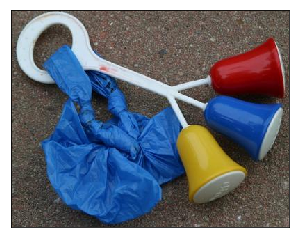

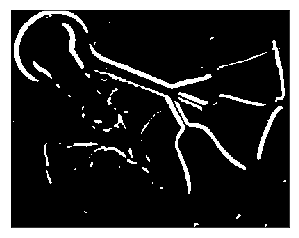

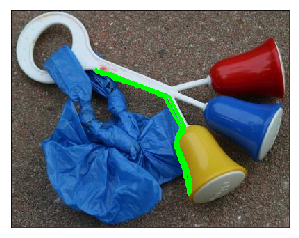

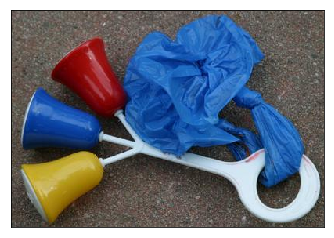

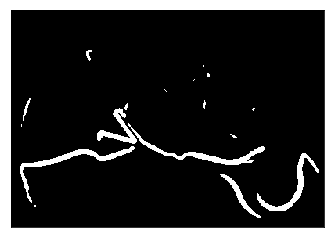

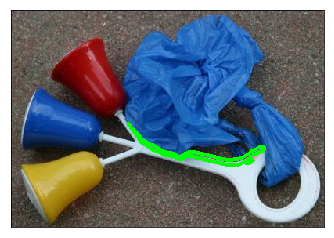

5.90984709702914

In [401]:
def matchContours(img1, img2, display_images=False):
    cnt1 = get_best_contour(img1, display_images)
    cnt2 = get_best_contour(img2, display_images)
    return cv2.matchShapes(cnt1, cnt2, cv2.CONTOURS_MATCH_I2, 0.0)


matchContours(train_images[1], test_images[2], True)

In [406]:
def classify_image_by_edges(img):
    similarities = {}
    for i, train_image in enumerate(train_images):
        similarities[train_images_files[i]] = matchContours(img, train_image)
    best_image = min(similarities.items(), key=lambda x: x[1])[0]
    return train_images_classes[best_image]


correct_predictions = 0
for i, test_image in enumerate(test_images):
    # print("Classifying: " + test_images_files[i])
    prediction = classify_image_by_edges(test_image)
    if prediction == test_images_classes[test_images_files[i]]:
        correct_predictions += 1

print("Accuracy: " + str(correct_predictions / len(test_images)))

Accuracy: 0.1232876712328767


### Препознавање со помош на шеми

In [444]:
def classify_image_by_template(img):
    similarities = {}
    width, height, _ = img.shape
    template_size = 5
    template = img[(width // 2 - template_size):(width // 2 + template_size), (
        height // 2 - template_size):(height // 2 + template_size)]
    for i, train_image in enumerate(train_images):
        res = cv2.matchTemplate(train_image, template, cv2.TM_CCORR_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        similarities[train_images_files[i]] = max_val
    best_image = max(similarities.items(), key=lambda x: x[1])[0]
    return train_images_classes[best_image]


correct_predictions = 0
for i, test_image in enumerate(test_images):
    # print("Classifying: " + test_images_files[i])
    prediction = classify_image_by_template(test_image)
    if prediction == test_images_classes[test_images_files[i]]:
        correct_predictions += 1

print("Accuracy: " + str(correct_predictions / len(test_images)))

Accuracy: 0.4931506849315068
